# Chain ID demo

This notebook provides a toy implementation of the chain ID algorithm that we discussed, together with a visualization of the updates that the algorithm performs. It also computes the number of visits to each node and argues that the worst-case runtime of the algorithm is combinatorially bad.

To make this argument, I will exhibit a topology with $\Theta(wh)$ nodes and edges but that takes
$\Theta(\binom{w+h-2}{w-1})$ time for the chain ID program. So, if $w=h$, there are quadratically
many nodes and edges but a worse than exponentially bad runtime.

In [189]:
import networkx as nx
import scipy as scp
import matplotlib.pyplot as plt

In [190]:
def grid(xdim, ydim):
    """Create an xdim by ydim grid in which each node has arrows going to its south and west
    neighbors.
    """
    G = nx.DiGraph()
    label = lambda i, j: (i, j)
    G.add_nodes_from([label(i, j) for i in range(ydim) for j in range(xdim)])
    for i in range(xdim):
        for j in range(ydim):
            if i < xdim-1:
                G.add_edges_from([(label(i, j), label(i+1, j))])
            if j < ydim-1:
                G.add_edges_from([(label(i, j), label(i, j+1))])
    return G

In [191]:
def draw(G, ids, special_node = None):
    """Draw G, annotated with the given chain IDs. Mark the special node with a ★ if there is a
    special node.
    """
    maxlen = max(len(i) for i in ids.values())
    nx.draw_spectral(
        G,
        node_size=2000,
        node_color='pink',
        alpha=0.5,
        labels={ node: ("★" if node == special_node else "") + "0" * (maxlen - len(ids[node])) + "".join(str(it) for it in ids[node]) for node in ids })

In [195]:
def chainids(G, verbose=True):
    """Return the number of bits used, the chain ids, and the number of visits that the algorithm
    performs on each node.
    """
    return chainids_rec(G, (0, 0), 1, dict(), dict(), verbose)
def chainids_rec(G, current_node, n_bits_used, chain_ids, n_visits, verbose):
    initial_n_bits_used = n_bits_used
    initial_chain_id = chain_ids.get(current_node, [])
    chain_ids[current_node] = [1] + [0] * (
        n_bits_used - len(initial_chain_id) - 1
    ) + initial_chain_id
    n_visits[current_node] = n_visits.get(current_node, 0) + 1
    if verbose:
        draw(G, chain_ids, current_node)
        plt.show()
    for i, successor in enumerate(G.neighbors(current_node)):
        n_bits_used, chain_ids, n_visits = chainids_rec(
            G,
            successor,
            n_bits_used if i == 0 else n_bits_used + 1,
            chain_ids,
            n_visits,
            verbose
        )
    chain_ids[current_node] = [1] * (
        n_bits_used - initial_n_bits_used
    ) + chain_ids[current_node]
    if verbose and n_bits_used > initial_n_bits_used:
        draw(G, chain_ids, current_node)
        plt.show()
    return n_bits_used, chain_ids, n_visits

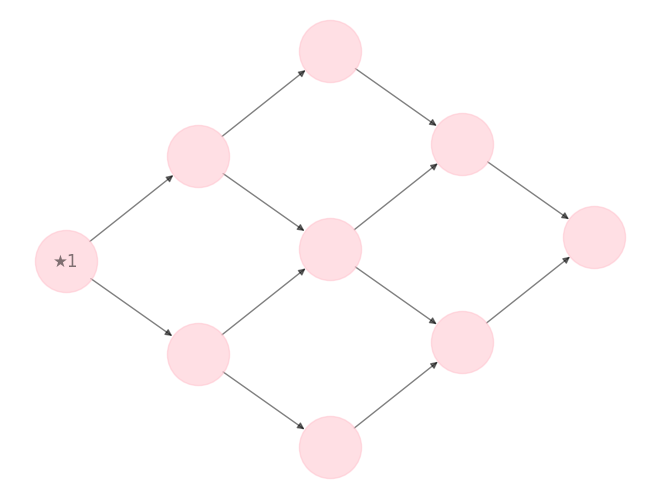

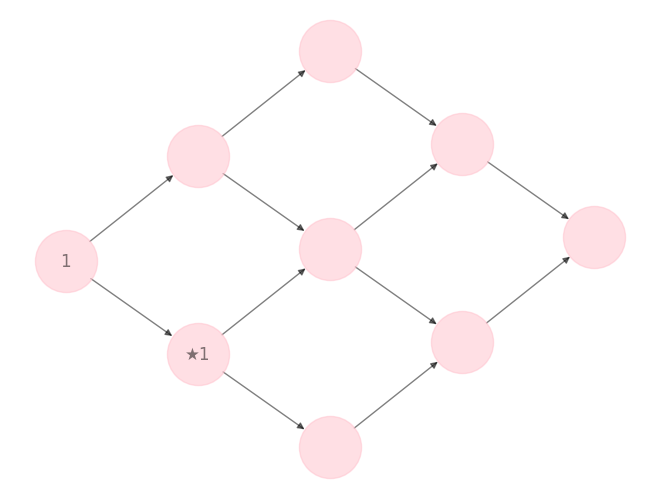

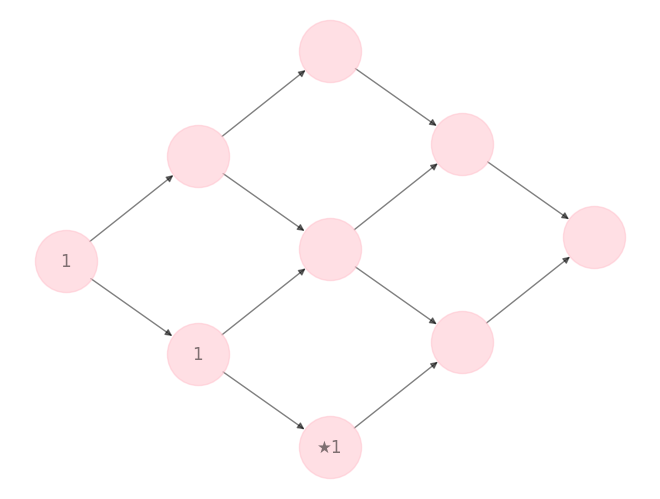

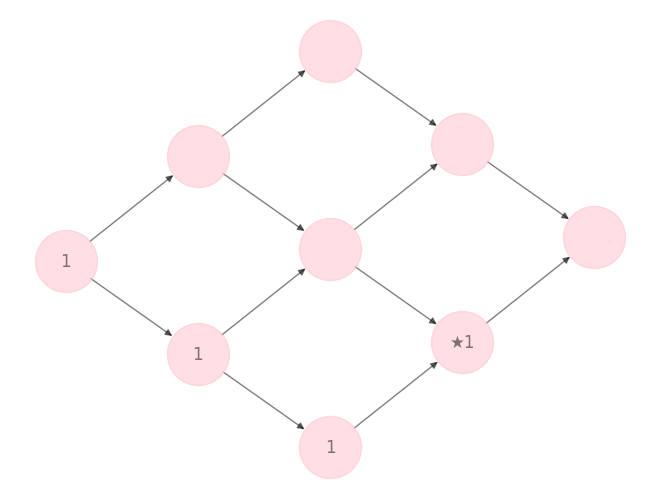

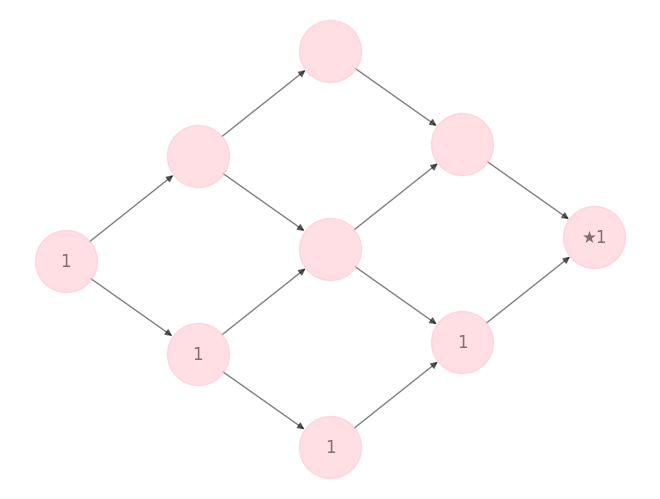

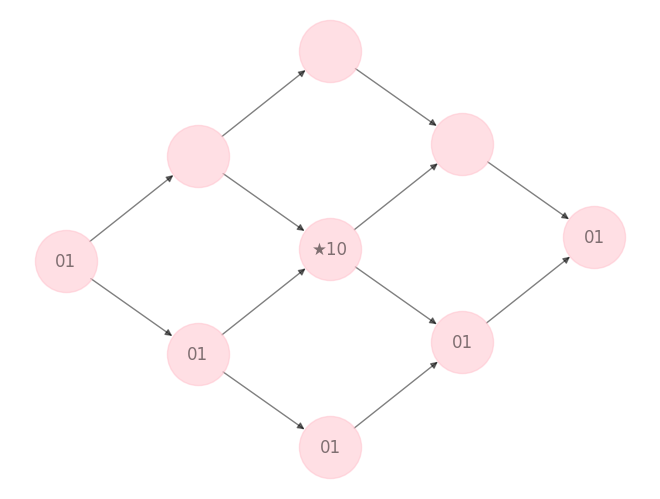

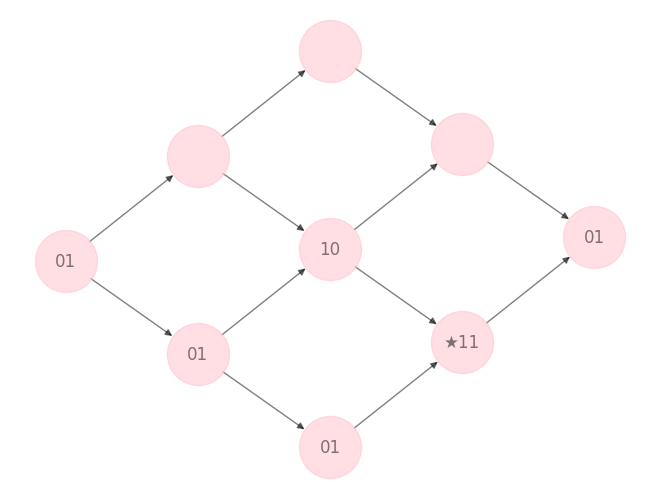

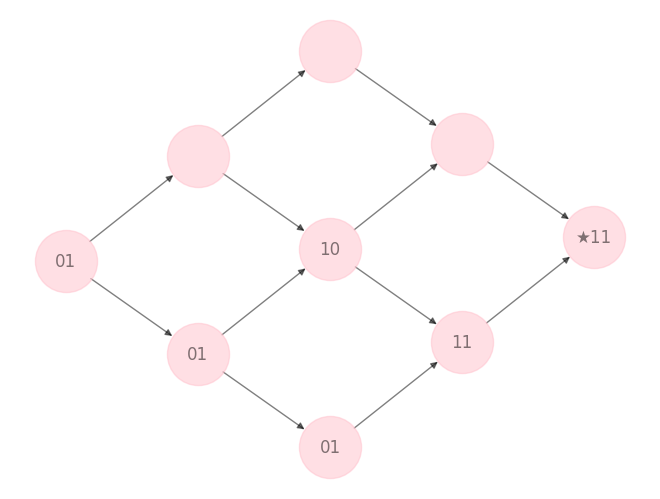

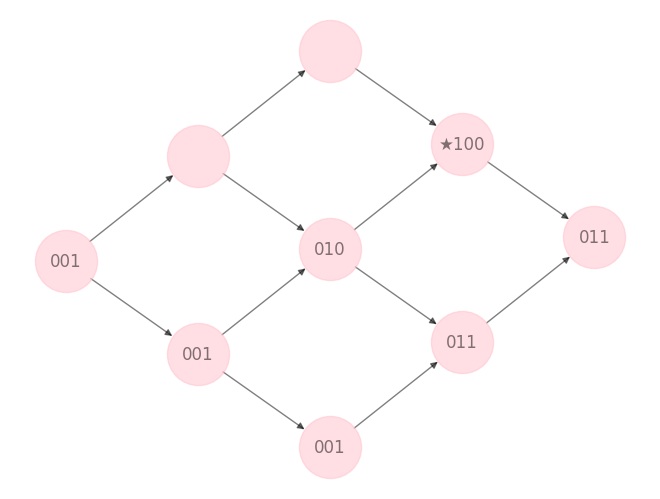

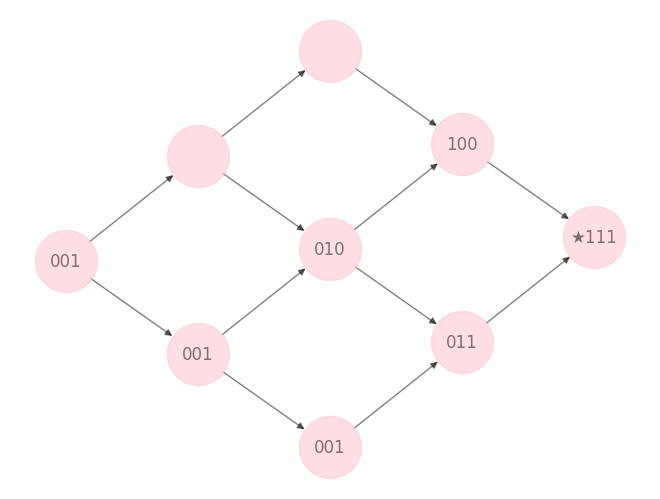

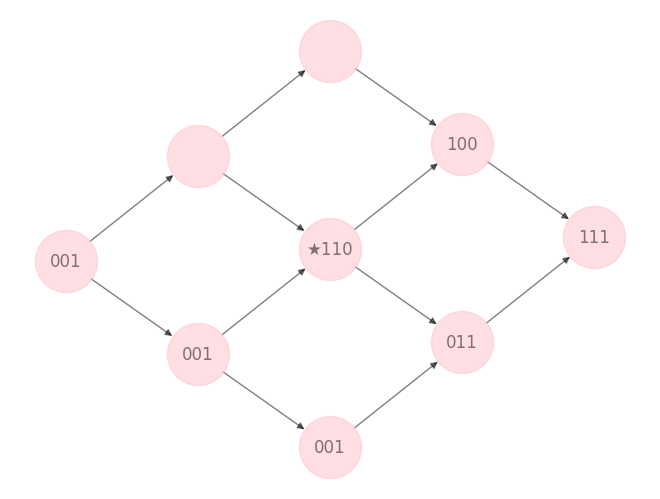

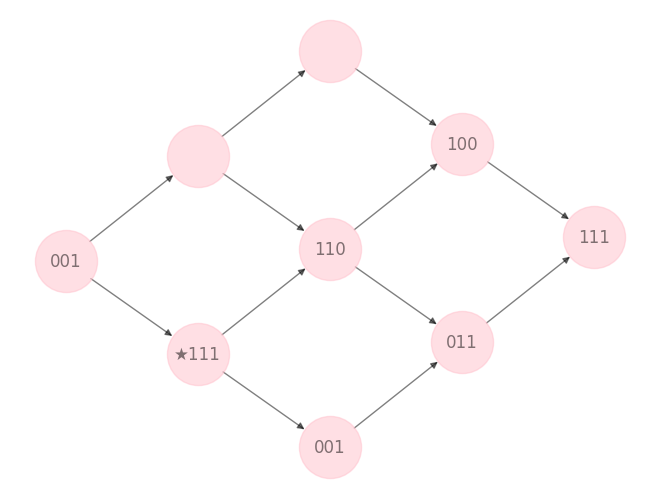

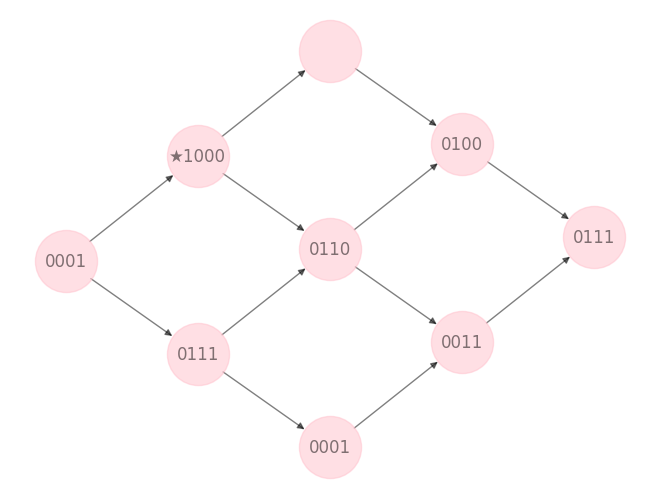

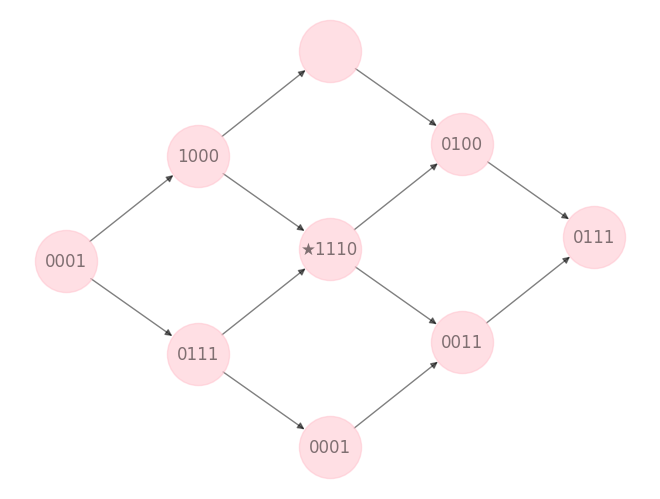

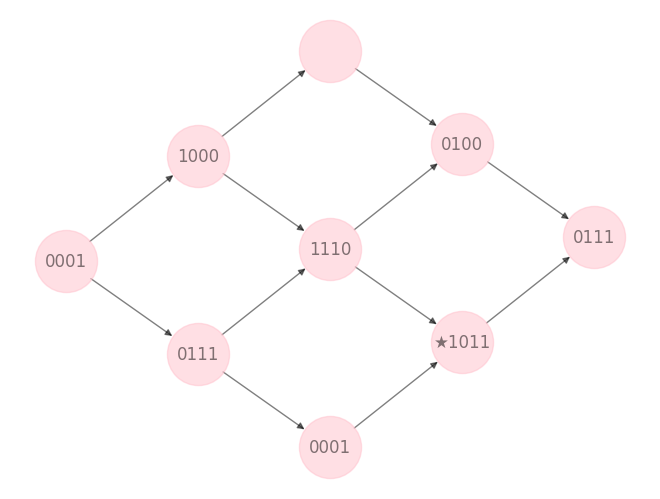

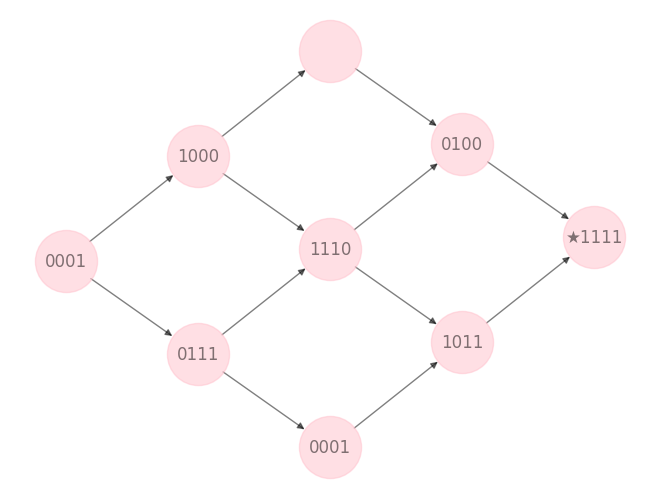

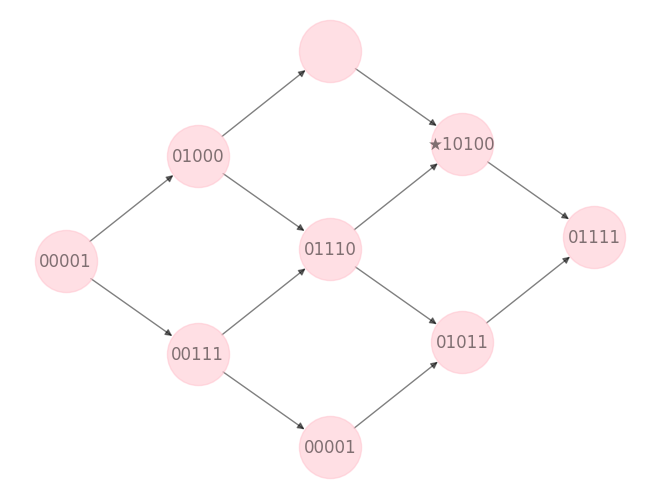

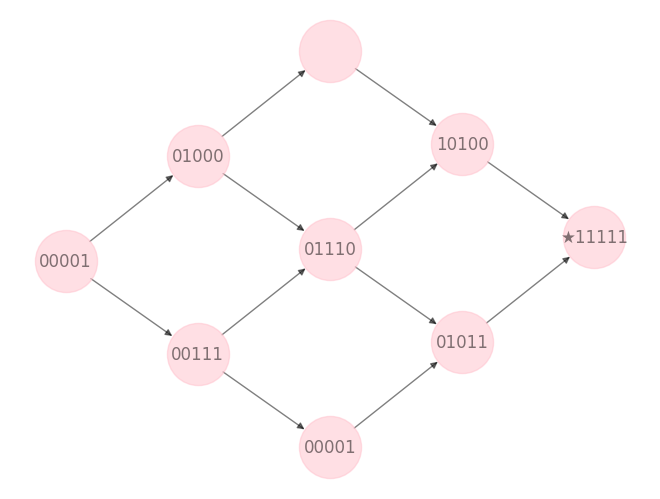

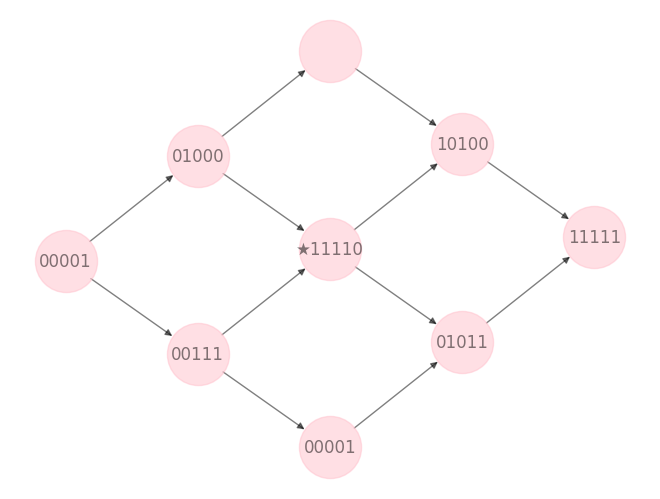

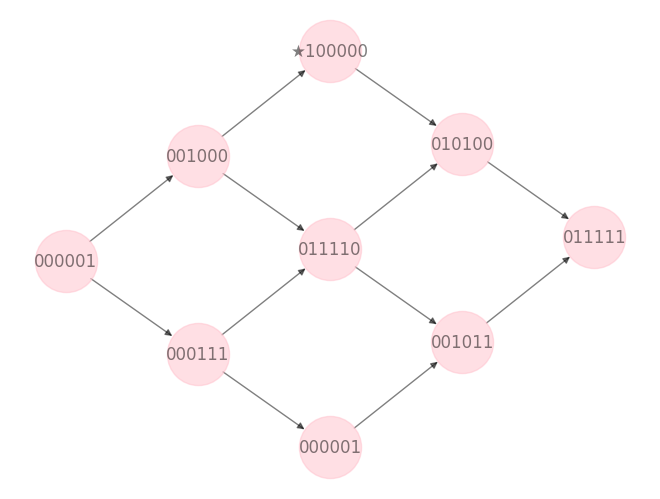

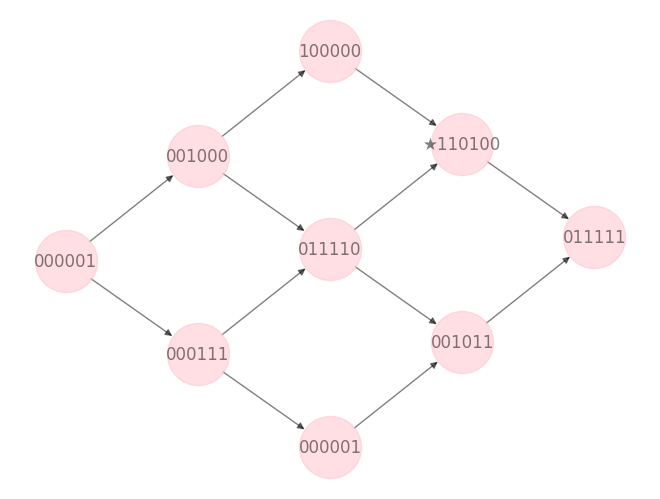

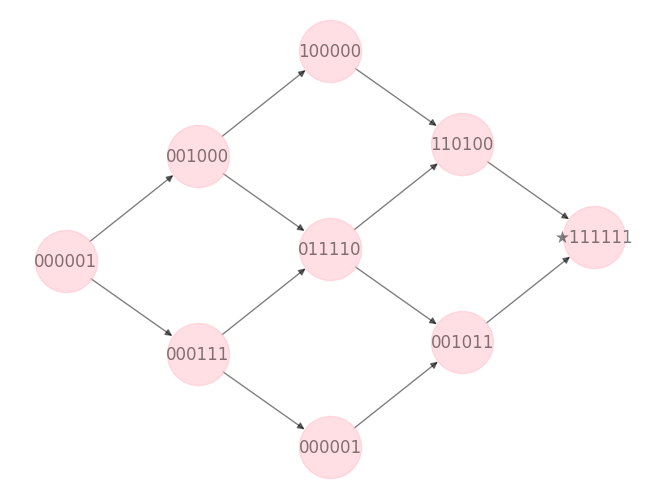

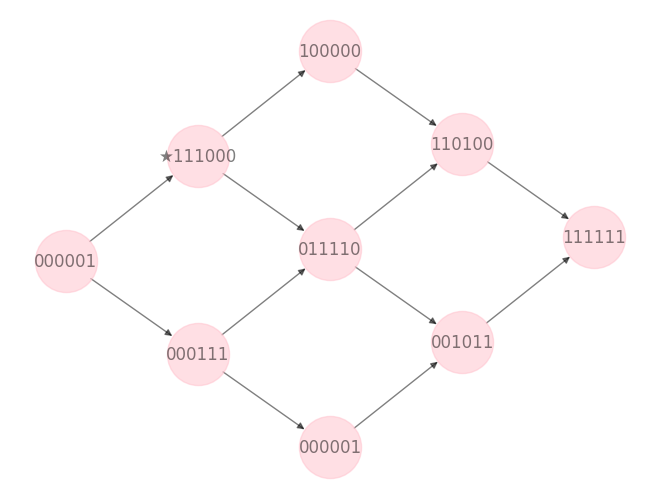

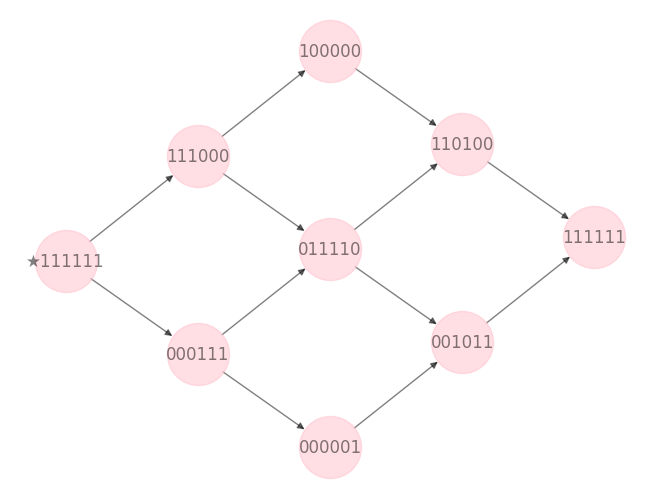

In [196]:
G = grid(3, 3)
num_bits, ids, num_visits = chainids(G)

In [194]:
num_visits

{(0, 0): 1,
 (1, 0): 1,
 (2, 0): 1,
 (2, 1): 3,
 (2, 2): 6,
 (1, 1): 2,
 (1, 2): 3,
 (0, 1): 1,
 (0, 2): 1}

Let $w$ denote the width of the grid and $h$ denote the height of the grid. There are $\Theta(wh)$ nodes and
$\Theta(wh)$ edges.

I point out that the number of visits to the $(2, 2)$ node is $\binom{4}{2} =
\binom{(w-1)+(h-1)}{w-1} = \binom{(w-1)+(h-1)}{h-1}$ since that is the number of paths from the root
$(0, 0)$ to the $(w-1, h-1)$ node. (You must traverse $(w-1)+(h-1)$ edges, and of those traversals
you must choose $w-1$ as horizontal traversals and $h-1$ as vertical traversals.) All of these paths
are traversed by the algorithm, because the algorithm is like a DFS that does not mark nodes as
visited.